##### Aim :- House Price prediction by using calfornia house data.

### Getting the data in efficient manner.

In [9]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarfile_path=Path("data/housing.tgz")
    if not tarfile_path.is_file():
        Path("data").mkdir(parents=True,exist_ok=True)
        url="https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarfile_path)
        with tarfile.open(tarfile_path) as housing_tarfile:
            housing_tarfile.extractall(path='data')
    
    return pd.read_csv(Path("data/housing/housing.csv"))

housing=load_housing_data()


### Taking a look at the data

In [10]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7205,-117.70,33.59,11.0,8039.0,1717.0,3445.0,1571.0,4.1678,190900.0,<1H OCEAN
16699,-116.47,34.07,22.0,5473.0,1234.0,2581.0,1098.0,1.9375,65300.0,INLAND
11259,-118.32,34.02,51.0,2010.0,460.0,1355.0,433.0,2.0304,133400.0,<1H OCEAN
11897,-122.15,37.44,52.0,1945.0,293.0,708.0,275.0,6.1655,500001.0,NEAR BAY
11204,-124.17,40.74,17.0,2026.0,338.0,873.0,313.0,4.0357,128900.0,NEAR OCEAN
14921,-122.65,38.24,24.0,1948.0,310.0,922.0,313.0,4.9500,243600.0,<1H OCEAN
16958,-117.18,32.84,31.0,3064.0,575.0,1476.0,549.0,3.6667,175900.0,NEAR OCEAN
7968,-122.21,37.79,35.0,1745.0,409.0,1143.0,386.0,2.8750,143800.0,NEAR BAY
19778,-119.64,36.32,32.0,2205.0,523.0,1772.0,479.0,1.3569,43100.0,INLAND
18000,-120.93,37.74,37.0,1956.0,402.0,1265.0,397.0,2.3023,91900.0,INLAND


In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### As we can see that total_bedrooms column has some missing values.

##### Knowing the total categories in ocean_proximity column

In [13]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


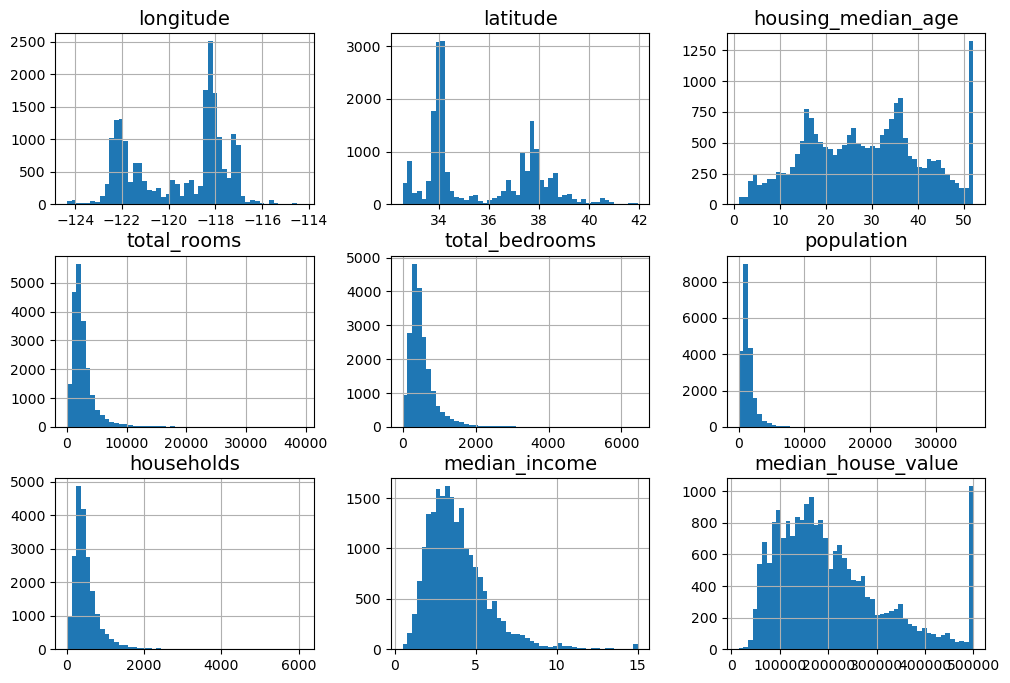

In [15]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50,figsize=(12,8))
plt.show()
